In [1]:
import requests
import bs4
import re
import numpy as np
import pandas as pd

In [2]:
page1 = 'https://www.goodreads.com/review/list/27739335-max?page=1&print=true&shelf=read&view=table'
page2 = 'https://www.goodreads.com/review/list/27739335-max?page=2&print=true&shelf=read&view=table'
page3 = 'https://www.goodreads.com/review/list/27739335-max?page=3&print=true&shelf=read&view=table'
page4 = 'https://www.goodreads.com/review/list/27739335-max?page=4&print=true&shelf=read&view=table'
page5 = 'https://www.goodreads.com/review/list/27739335-max?page=5&print=true&shelf=read&view=table'


In [3]:
req1, req2, req3, req4, req5 = [requests.get(page)
                                for page in [page1, page2, page3, page4, page5]]

In [4]:
soup1, soup2, soup3, soup4, soup5 = [bs4.BeautifulSoup(page.text, "lxml")
                                    for page in [req1, req2, req3, req4, req5] ]

In [5]:
type(req1)

requests.models.Response

In [22]:
soup2

<html>
<head>
<title>Max’s 'read' books on Goodreads (113 books)</title>
<meta content="Max has 113 books on their read shelf: Things The Grandchildren Should Know by Mark Oliver Everett, Breakfast at Tiffany's and Three Stories by Truman Ca..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.goodreads.com/review/list/27739335?shelf=read" rel="canonical"/>
<meta content="Max’s 'read' books on Goodreads (113 books)" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="Goodreads" property="og:site_name"/>
<meta content="Max has 113 books on their read shelf: Things The Grandchildren Should Know by Mark Oliver Everett, Breakfast at Tiffany's and Three Stories by Truman Ca..." property="og:description"/>
<meta content="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1329443536l/2268120.jpg" property="og:image"/>
<meta content="https://www.goodreads.com/review/list/27739335?shelf=read" pro

In [8]:
titlesAll = []
for soup in [soup1, soup2, soup3, soup4, soup5]:
    for a in soup.find_all('a', title = True): 
        if a.text: 
            titlesAll.append(a['title'])

In [9]:
len(titlesAll)

600

In [10]:
titlesAll

['New Hope for the Dead (Hoke Mosely #2)',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'The Casino Murder Case (Philo Vance Mystery #8)',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'The Doors of Perception',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'The Doors of Perception & Heaven and Hell',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'The Bad Beginning (A Series of Unfortunate Events, #1)',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'For Whom the Bell Tolls',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'Il sentiero dei nidi di ragno',
 'did not like it',
 'it was ok',
 'liked it',
 'really liked it',
 'it was amazing',
 'The Vampire Lestat (The Vampire Chronicles, #2)',
 'did not like it',
 'it was ok',
 'liked it',
 'really 

In [11]:
titlesRead = []
for word in titlesAll:
    if word[0].isupper() or word[0].isdigit():
        titlesRead.append(word)

In [12]:
len(titlesRead)

100

In [13]:
titlesRead

['New Hope for the Dead (Hoke Mosely #2)',
 'The Casino Murder Case (Philo Vance Mystery #8)',
 'The Doors of Perception',
 'The Doors of Perception & Heaven and Hell',
 'The Bad Beginning (A Series of Unfortunate Events, #1)',
 'For Whom the Bell Tolls',
 'Il sentiero dei nidi di ragno',
 'The Vampire Lestat (The Vampire Chronicles, #2)',
 'The Wonderful Wizard of Oz (Oz, #1)',
 'The House of Sleep',
 'The Noise of Time',
 'The Da Vinci Code (Robert Langdon, #2)',
 'Asleep',
 'The Sign of Four (Sherlock Holmes, #2)',
 'The Adventures of Tom Sawyer',
 'The Hound of the Baskervilles (Sherlock Holmes, #5)',
 'La ragazza di Bube',
 'Crash',
 'Flow My Tears, the Policeman Said',
 'Lost in Music',
 'Things The Grandchildren Should Know',
 "Breakfast at Tiffany's and Three Stories",
 'Cocaine Nights',
 'Chronicle of a Death Foretold',
 'The Taming of the Shrew',
 'The Merchant of Venice',
 'Othello',
 "A Midsummer Night's Dream",
 'King Lear',
 'Hamlet',
 'Romeo and Juliet',
 'Savages (Savag

In [14]:
ratingsScraped = []
for soup in [soup1, soup2, soup3, soup4, soup5]:
    for a in soup.find_all('span', title = True): 
        if a.text: 
            ratingsScraped.append(a['title'])

In [15]:
ratingsScraped

['it was amazing',
 'July 16, 2020',
 'really liked it',
 'July 16, 2020',
 'July 16, 2020',
 'really liked it',
 'July 16, 2020',
 'Goodreads Author!',
 'really liked it',
 'July 16, 2020',
 'it was amazing',
 'May 23, 2020',
 'really liked it',
 'May 03, 2020',
 'really liked it',
 'April 28, 2020',
 'really liked it',
 'April 17, 2020',
 'Goodreads Author!',
 'it was amazing',
 'April 15, 2020',
 'really liked it',
 'March 30, 2020',
 'Goodreads Author!',
 'really liked it',
 'March 25, 2020',
 'really liked it',
 'February 29, 2020',
 'really liked it',
 'February 20, 2020',
 'it was amazing',
 'February 14, 2020',
 'it was amazing',
 'February 01, 2020',
 'really liked it',
 'November 04, 2018',
 'liked it',
 'December 29, 2016',
 'it was amazing',
 'December 28, 2016',
 'liked it',
 'December 23, 2016',
 'really liked it',
 'December 23, 2016',
 'really liked it',
 'February 02, 2015',
 'really liked it',
 'February 02, 2015',
 'it was amazing',
 'April 21, 2014',
 'liked it',
 '

In [16]:
ratingsGiven = []
for word in ratingsScraped:
    if word[0].islower():
        ratingsGiven.append(word)

In [17]:
len(ratingsGiven)

99

In [18]:
ratingsGiven

['it was amazing',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'it was amazing',
 'really liked it',
 'liked it',
 'it was amazing',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'really liked it',
 'really liked it',
 'really liked it',
 'liked it',
 'really liked it',
 'it was amazing',
 'liked it',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'liked it',
 'it 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from scipy.sparse import csr_matrix

In [27]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
bookTags = pd.read_csv('book_tags.csv')
toRead = pd.read_csv('to_read.csv')

In [28]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [29]:
books.shape 

(10000, 23)

In [30]:
len(books.id.unique()) 

10000

In [31]:
books[['id', 'book_id', 'authors', 'title', 'average_rating', 'ratings_count']] \
     .sort_values('average_rating', ascending = False).head(20)

,id,book_id,authors,title,average_rating,ratings_count
3627,3628,24812,Bill Watterson,The Complete Calvin and Hobbes,4.82,28900
3274,3275,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220
861,862,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,8854,95602,Francine Rivers,Mark of the Lion Trilogy,4.76,9081
7946,7947,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,4.76,8953
4482,4483,24814,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,6361,70489,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,422,862041,J.K. Rowling,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
3752,3753,10,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
6919,6920,24815,Bill Watterson,The Indispensable Calvin and Hobbes,4.73,14597


In [32]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [33]:
ratings.shape 

(981756, 3)

In [34]:
len(ratings.book_id.unique()) 

10000

In [35]:
len(ratings.user_id.unique())

53424

In [36]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [37]:
len(tags.tag_id.unique())  

34252

In [38]:
bookTags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [39]:
bookTags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [40]:
len(bookTags.goodreads_book_id.unique())

10000

In [41]:
len(bookTags.tag_id.unique())

34252

In [42]:
toRead.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [43]:
toRead.shape

(912705, 2)

In [44]:
len(toRead.book_id.unique()) 

9986

In [45]:
len(toRead.user_id.unique()) 

48871

In [47]:
maxRatings = pd.read_csv('maxRatings.csv')
maxRatings.head()

,Unnamed: 0,title,rating
0,0,La ragazza di Bube,3
1,1,Crash,3
2,2,"Flow My Tears, the Policeman Said",5
3,3,Lost in Music,3
4,4,Things The Grandchildren Should Know,4


In [48]:
maxRatings.shape  

(97, 3)

In [49]:
max(ratings['user_id'])

53424

In [50]:
maxRatings['user_id'] = 55000

In [51]:
maxRatingsWithId = pd.merge(maxRatings, books, on = 'title')
maxRatingsWithId.head()

,Unnamed: 0,title,rating,user_id,id,book_id,best_book_id,work_id,books_count,isbn,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,Crash,3,55000,7232,70241,70241,68058,81,312420331,...,13217,15187,925,825,1804,3900,5091,3567,https://images.gr-assets.com/books/1281416649m...,https://images.gr-assets.com/books/1281416649s...
1,2,"Flow My Tears, the Policeman Said",5,55000,4326,22584,22584,949696,92,1857983416,...,22063,25396,1187,206,1104,6014,10985,7087,https://images.gr-assets.com/books/1398026028m...,https://images.gr-assets.com/books/1398026028s...
2,6,Chronicle of a Death Foretold,5,55000,1239,23878,23878,59137,269,140003471X,...,56200,81653,3996,955,4077,18369,33190,25062,https://images.gr-assets.com/books/1430736599m...,https://images.gr-assets.com/books/1430736599s...
3,7,The Taming of the Shrew,3,55000,773,47021,47021,3152341,689,074347757X,...,126318,134240,2370,2869,9611,35666,47453,38641,https://images.gr-assets.com/books/1327935253m...,https://images.gr-assets.com/books/1327935253s...
4,8,The Merchant of Venice,3,55000,839,24128,24128,2682703,1088,743477561,...,115621,128289,2616,1925,9212,36917,46745,33490,https://images.gr-assets.com/books/1327871054m...,https://images.gr-assets.com/books/1327871054s...


In [52]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [58]:
userRatesPerBookCount = ratings.groupby(['user_id', 'book_id'], as_index = False).count().sort_values('rating', ascending = False)
userRatesPerBookCount.head(15)

,user_id,book_id,rating
59787,3204,8946,5
729574,38259,3996,4
11033,691,6472,4
665335,34548,7420,4
81315,4359,2515,4
42643,2308,8946,4
572,42,8946,4
95001,5091,8946,4
81324,4359,3470,3
54390,2935,8946,3


In [59]:
ratings[(ratings.user_id == 3204) & (ratings.book_id == 8946)]

,book_id,user_id,rating
883706,8946,3204,5
883707,8946,3204,5
883708,8946,3204,5
883709,8946,3204,5
883710,8946,3204,4


In [60]:
userRatesPerBookMean = ratings.groupby(['user_id', 'book_id'], as_index = False).mean().round(0).sort_values('rating', ascending = False)
userRatesPerBookMean.head(15)

,user_id,book_id,rating
489739,25094,6395,5.0
280452,14074,4053,5.0
280426,14074,1753,5.0
671540,34898,4929,5.0
280423,14074,1633,5.0
280422,14074,1603,5.0
280421,14074,1560,5.0
280420,14074,1533,5.0
280418,14074,1493,5.0
280417,14074,1434,5.0


In [61]:
userRatesPerBookMean[(userRatesPerBookMean.user_id == 3204) & (userRatesPerBookMean.book_id == 8946)]

,user_id,book_id,rating
59787,3204,8946,5.0


In [62]:
ratings['count'] = ratings['rating']

userRatesPerBook = ratings.groupby(['user_id', 'book_id'], as_index = False) \
                   .agg({'rating' : 'mean', 'count' : 'count'}) \
                   .rename(columns = {'rating':'mean'}) \
                   .sort_values('count', ascending = False)

ratings = ratings.drop(['count'], axis = 1)
            
userRatesPerBook['mean'] = userRatesPerBook['mean'].round(0)
userRatesPerBook.head()

,user_id,book_id,mean,count
59787,3204,8946,5.0,5
729574,38259,3996,5.0,4
11033,691,6472,5.0,4
665335,34548,7420,5.0,4
81315,4359,2515,5.0,4


In [63]:
ratings = pd.merge(ratings, userRatesPerBook, on = ['user_id', 'book_id'])
ratings.head()

,book_id,user_id,rating,mean,count
0,1,314,5,5.0,1
1,1,439,3,3.0,1
2,1,588,5,5.0,1
3,1,1169,4,4.0,1
4,1,1185,4,4.0,1


In [64]:
ratings.sort_values('count', ascending = False).head(15)

,book_id,user_id,rating,mean,count
883710,8946,3204,4,5.0,5
883706,8946,3204,5,5.0,5
883709,8946,3204,5,5.0,5
883708,8946,3204,5,5.0,5
883707,8946,3204,5,5.0,5
251241,2515,4359,5,5.0,4
883651,8946,42,5,5.0,4
399011,3996,38259,5,5.0,4
883720,8946,5091,5,5.0,4
883719,8946,5091,5,5.0,4


In [65]:
ratings.shape 

(981756, 5)

In [70]:
ratings.head()

,book_id,user_id,mean
883706,8946,3204,5.0
883651,8946,42,5.0
883697,8946,2308,5.0
736954,7420,34548,5.0
883717,8946,5091,5.0


In [72]:
ratings.columns = ['book_id', 'user_id', 'rating']

In [73]:
ratings.columns

Index(['book_id', 'user_id', 'rating'], dtype='object')

In [74]:
ratesPerUser = ratings[['user_id', 'rating']].groupby(['user_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'totalRatings'}) \
                      .sort_values('totalRatings', ascending = False)

ratesPerUser.head(10)

,user_id,totalRatings
12873,12874,200
30943,30944,200
52035,52036,199
12380,12381,199
28157,28158,199
45553,45554,197
6629,6630,197
19728,19729,196
9667,9668,196
14371,14372,196


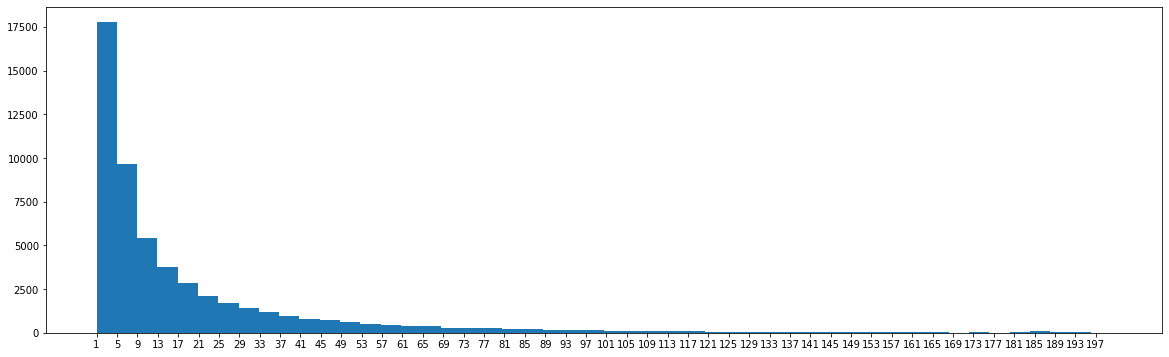

In [76]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.hist(ratesPerUser['totalRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerUser['totalRatings']), max(ratesPerUser['totalRatings'])+1, 4.0))
plt.show()

In [77]:
ratings = pd.merge(ratings, ratesPerUser, on = ['user_id'])

In [78]:
ratings.sort_values('totalRatings', ascending = False).head(10)

,book_id,user_id,rating,totalRatings
103127,162,12874,2.0,200
103124,145,12874,3.0,200
103122,121,12874,3.0,200
103121,150,12874,3.0,200
103120,138,12874,3.0,200
103119,130,12874,4.0,200
103118,29,12874,3.0,200
103117,26,12874,5.0,200
103116,116,12874,4.0,200
103115,117,12874,4.0,200


In [79]:
minimumRatings = ratings.totalRatings <= 20
np.sum(minimumRatings)

272086

In [80]:
ratings = ratings[-minimumRatings]
len(ratings)

707392

In [81]:
len(ratings.user_id.unique())

13971

In [82]:
len(ratings.book_id.unique())

9998

In [83]:
ratesPerBook = ratings[['book_id', 'rating']].groupby(['book_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'receivedRatings'}) \
                      .sort_values('receivedRatings', ascending = False)

ratesPerBook.tail()

,book_id,receivedRatings
9342,9345,2
9855,9858,1
9087,9090,1
8802,8804,1
8371,8372,1


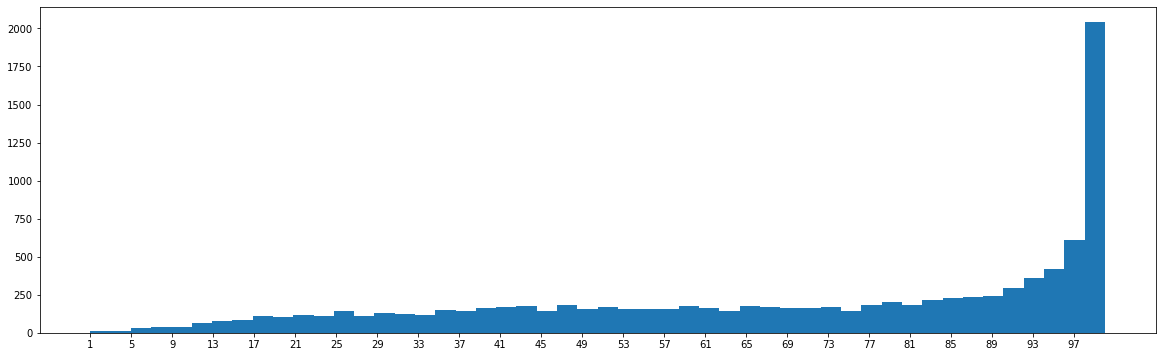

In [84]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.hist(ratesPerBook['receivedRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerBook['receivedRatings']), max(ratesPerBook['receivedRatings'])+1, 4.0))
plt.show()

In [85]:
ratings = pd.merge(ratings, ratesPerBook, on = ['book_id'])

In [86]:
minimumReceived = ratings.receivedRatings < 30
np.sum(minimumReceived)

21710

In [87]:
ratings = ratings[-minimumReceived]
len(ratings)

685682

In [88]:
len(ratings.user_id.unique())

13970

In [89]:
len(ratings.book_id.unique()) 

8885

In [90]:
ratings.shape

(685682, 5)

In [91]:
showingTitles = pd.merge(ratings, books[['id', 'authors', 'title']], how = 'left', left_on = ['book_id'], right_on = ['id'])

In [92]:
topRated = showingTitles.groupby(['book_id'], as_index = False) \
                      .agg({'rating' : 'mean', \
                           'authors': 'first', \
                           'title' : 'first'})
topRated.sort_values('rating', ascending = False).head(10)

,book_id,rating,authors,title
6631,6920,4.806452,Bill Watterson,The Indispensable Calvin and Hobbes
8622,9566,4.800000,Bill Watterson,Attack of the Deranged Mutant Killer Monster S...
5094,5207,4.774648,Bill Watterson,The Days Are Just Packed: A Calvin and Hobbes ...
8237,8978,4.767857,Bill Watterson,The Revenge of the Baby-Sat
4061,4107,4.750000,"Andrew Williamson, Andrew Williamson",Harry Potter: A Pop-Up Book: Based on the Film...
6341,6590,4.750000,Bill Watterson,The Authoritative Calvin and Hobbes: A Calvin ...
7602,8109,4.745763,"Neil Gaiman, Mike Dringenberg, Chris Bachalo, ...","The Absolute Sandman, Volume One"
6142,6361,4.738095,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...
4422,4483,4.738095,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...
3596,3628,4.734694,Bill Watterson,The Complete Calvin and Hobbes


In [93]:
showingTagName = pd.merge(bookTags, tags, on = 'tag_id')
showingTagName.sort_values('goodreads_book_id').head(20)

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
258362,1,33165,338,youth
250046,1,17213,347,kindle
246919,1,27535,348,shelfari-favorites
245888,1,16799,351,juvenile
245375,1,18851,354,made-me-cry
240136,1,25151,364,read-in-2015
238876,1,11550,368,favorite-series
237950,1,11491,384,faves
237815,1,32654,386,wizards


In [94]:
mostUsedTags = showingTagName.groupby(['tag_name'], as_index = False) \
                      .agg({'goodreads_book_id' : 'count'}) \
                      .rename(columns = {'goodreads_book_id' : 'number'}) \
                      .sort_values('number', ascending = False)
mostUsedTags.head()

,tag_name,number
30574,to-read,9983
11557,favorites,9881
22743,owned,9858
5207,books-i-own,9799
8717,currently-reading,9776


In [95]:
genres = pd.read_csv('genres.csv')
genres.head(10)

,Unnamed: 0,tag_name
0,0,art
1,1,biography
2,2,business
3,3,children-s
4,4,christian
5,5,classics
6,6,comics
7,7,cookbooks
8,8,ebooks
9,9,fantasy


In [96]:
genres.shape   

(1235, 2)

In [97]:
genreList = genres['tag_name'].tolist()


In [98]:
len(genreList)

1235

In [99]:
len(tags.tag_name.unique()) 

34252

In [100]:
genreTags = tags.loc[tags['tag_name'].isin(genreList)]
len(genreTags)  

832

In [101]:
mostCommonTags = pd.merge(bookTags, genreTags, on = ['tag_id'])

In [102]:
stringedTags = mostCommonTags.groupby('goodreads_book_id')['tag_name'].apply(lambda x: "%s" % ' '.join(x)).reset_index()

In [103]:
stringedTags.head(20)

,goodreads_book_id,tag_name
0,1,fantasy young-adult fiction magic childrens ad...
1,2,fantasy young-adult fiction magic children-s n...
2,3,fantasy young-adult fiction magic childrens ad...
3,5,fantasy young-adult fiction magic childrens ad...
4,6,fantasy young-adult fiction childrens adventur...
5,8,fantasy young-adult fiction magic childrens ad...
6,10,fantasy young-adult fiction magic childrens ad...
7,11,fantasy young-adult fiction adventure classics...
8,13,fantasy young-adult fiction adventure classics...
9,21,fiction humor funny adult space science abando...


In [104]:
stringedTags = pd.merge(stringedTags, books[['book_id', 'authors', 'title']], left_on = ['goodreads_book_id'], \
                       right_on = ['book_id']).drop('book_id', axis = 1)

In [105]:
stringedTags.head(5)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...


In [106]:
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
stringedTags.head(5)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,"j.k.rowling,marygrandpré",Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,"j.k.rowling,marygrandpré",Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,"j.k.rowling,marygrandpré",Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,"j.k.rowling,marygrandpré,rufusbeck",Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,"j.k.rowling,marygrandpré",Harry Potter and the Goblet of Fire (Harry Pot...


In [107]:
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))
stringedTags

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré rufusbeck,Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,j.k.rowling marygrandpré,Harry Potter and the Goblet of Fire (Harry Pot...
...,...,...,...,...
9995,31538647,fantasy young-adult fiction magic childrens ch...,j.k.rowling,Hogwarts: An Incomplete and Unreliable Guide (...
9996,31845516,fiction contemporary love adult abandoned eboo...,glennondoylemelton,Love Warrior
9997,32075671,young-adult fiction novels teen romance contem...,angiethomas,The Hate U Give
9998,32848471,fiction romance contemporary love humor funny ...,vikeeland,Egomaniac


In [108]:
stringedTags['all_tags'] = stringedTags['tag_name'] + " " + stringedTags['authors']
stringedTags.all_tags[1]

'fantasy young-adult fiction magic children-s novels paranormal teen witches urban-fantasy supernatural mystery wizards juvenile romance coming-of-age science-fiction-fantasy boarding-school action british-literature young-adult-fantasy j.k.rowling marygrandpré'

In [109]:
countVec = CountVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')

In [110]:
tagMatrix = countVec.fit_transform(stringedTags['all_tags'])
tagMatrix 


<10000x26750 sparse matrix of type '<class 'numpy.int64'>'
	with 509529 stored elements in Compressed Sparse Row format>

In [112]:
cosineSim = cosine_similarity(tagMatrix, tagMatrix)
cosineSim.shape

(10000, 10000)

In [113]:
cosineSim

array([[1.        , 0.7643608 , 0.92288947, ..., 0.27508955, 0.21854335,
        0.22239287],
       [0.7643608 , 1.        , 0.71674754, ..., 0.26169537, 0.21271497,
        0.19981092],
       [0.92288947, 0.71674754, 1.        , ..., 0.18654789, 0.1717795 ,
        0.17928749],
       ...,
       [0.27508955, 0.26169537, 0.18654789, ..., 1.        , 0.25668451,
        0.27820744],
       [0.21854335, 0.21271497, 0.1717795 , ..., 0.25668451, 1.        ,
        0.77234329],
       [0.22239287, 0.19981092, 0.17928749, ..., 0.27820744, 0.77234329,
        1.        ]])

In [114]:
stringedTags = stringedTags.reset_index()
bookTitles = stringedTags['title']
indices = pd.Series(stringedTags.index, index = bookTitles)

In [115]:
def topRecommendations(title):
    index = indices[title]
    similarityScore = list(enumerate(cosineSim[index]))
    similarityScore = sorted(similarityScore, key = lambda x: x[1], reverse = True)
    similarityScore = similarityScore[1:10]
    bookIndex = [i[0] for i in similarityScore]
    return bookTitles.iloc[bookIndex]

In [116]:
topRecommendations('Harry Potter and the Half-Blood Prince (Harry Potter, #6)').head(10)

3890    Harry Potter and the Deathly Hallows (Harry Po...
2       Harry Potter and the Sorcerer's Stone (Harry P...
1276    Harry Potter and the Chamber of Secrets (Harry...
4       Harry Potter and the Goblet of Fire (Harry Pot...
5686             Harry Potter Boxset (Harry Potter, #1-7)
3       Harry Potter and the Prisoner of Azkaban (Harr...
3488    The Harry Potter Collection 1-4 (Harry Potter,...
5891    Harry Potter and the Order of the Phoenix (Har...
5       Harry Potter Boxed Set, Books 1-5 (Harry Potte...
Name: title, dtype: object

In [117]:
topRecommendations('The Catcher in the Rye').head(10)

350             The Great Gatsby
198        To Kill a Mockingbird
87               Of Mice and Men
326          The Grapes of Wrath
1209    A Tree Grows in Brooklyn
4224                  The Chosen
1048         Death of a Salesman
982                 Housekeeping
174      The Old Man and the Sea
Name: title, dtype: object

In [118]:
topRecommendations('Fear and Loathing in Las Vegas').head(10)

2954          On the Road
5043      The Dharma Bums
2628          Post Office
1463        The Rum Diary
2235                Women
2236           Ham on Rye
578         Infinite Jest
1653                Junky
839     Desolation Angels
Name: title, dtype: object

In [119]:
topRecommendations('The Great Gatsby').head(10)

87              Of Mice and Men
405      The Catcher in the Rye
1048        Death of a Salesman
440                 Ethan Frome
174     The Old Man and the Sea
198       To Kill a Mockingbird
326         The Grapes of Wrath
1381               The Crucible
445                   The Pearl
Name: title, dtype: object

In [120]:
topRecommendations('Slaughterhouse-Five').head(10)

4112                  Catch-22
2629        Johnny Got His Gun
877         A Farewell to Arms
3885              Cat's Cradle
5423                   Grendel
775               Mother Night
382     Breakfast of Champions
635                Animal Farm
781                  Bluebeard
Name: title, dtype: object

In [121]:
ratingsWithTitles = pd.merge(ratings, books[['id', 'title']], left_on = ['book_id'], right_on = ['id'])

In [122]:
userByBook = pd.pivot_table(ratingsWithTitles, index = ['user_id'], columns = ['title'], values = ['rating'])
userByBook

rating                         \
title    Angels (Walsh Family, #3) #GIRLBOSS 'Salem's Lot   
user_id                                                     
7                              NaN       NaN          NaN   
19                             NaN       NaN          NaN   
23                             NaN       NaN          NaN   
27                             NaN       NaN          NaN   
35                             NaN       NaN          NaN   
...                            ...       ...          ...   
53401                          NaN       NaN          NaN   
53403                          NaN       NaN          NaN   
53409                          NaN       NaN          NaN   
53411                          NaN       NaN          NaN   
53413                          NaN       NaN          NaN   

                                                                     \
title   'Tis (Frank McCourt, #2) 1,000 Places to See Before You Die   
user_id                                                               
7                            NaN                                NaN   
19                           NaN                                NaN   
23                           NaN                                NaN   
27                           NaN                                NaN   
35                           NaN                                NaN   
...                          ...                                ...   
53401                        NaN                                NaN   
53403                        NaN                                NaN   
53409                        NaN                                NaN   
53411                        NaN                                NaN   
53413                        NaN                                NaN   

                                                                                                                                       \
title   10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works   
user_id                                                                                                                                 
7                                                      NaN                                                                              
19                                                     NaN                                                                              
23                                                     NaN                                                                              
27                                                     NaN                                                                              
35                                                     NaN                                                                              
...                                                    ...                                                                              
53401                                                  NaN                                                                              
53403                                                  NaN                                                                              
53409                                                  NaN                                                                              
53411                                                  NaN                                                                              
53413                                                  NaN                                                                              

                                                                     \
title   100 Bullets, Vol. 1: First Shot, Last Call 100 Love Sonnets   
user_id                                                               
7                                             

In [123]:
userByBook.shape

(13970, 8854)

In [124]:
userByBook.columns = userByBook.columns.droplevel(0)

In [ ]:
corrMatrix50 = userByBook.corr(method = 'pearson', min_periods = 50)
corrMatrix50


In [ ]:
def newRecommendations_50(title):
    bookRating = corrMatrix50[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_50('1984')

In [ ]:
corrMatrix40 = userByBook.corr(method = 'pearson', min_periods = 40)

In [ ]:
def newRecommendations_40(title):
    bookRating = corrMatrix40[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_40('1984')

In [ ]:
corrMatrix30 = userByBook.corr(method = 'pearson', min_periods = 30)

In [ ]:
def newRecommendations_30(title):
    bookRating = corrMatrix30[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_30('1984')

In [ ]:
newRecommendations_40('1984')

In [ ]:
newRecommendations_50('1984')

In [ ]:
newRecommendations_30('Slaughterhouse-Five')

In [ ]:
newRecommendations_40('Slaughterhouse-Five')

In [ ]:
newRecommendations_50('Slaughterhouse-Five')

In [ ]:
newRecommendations_30('Fear and Loathing in Las Vegas')

In [ ]:
newRecommendations_40('Fear and Loathing in Las Vegas')

In [ ]:
newRecommendations_50('Fear and Loathing in Las Vegas')

In [ ]:
myRatings = userByBook.loc[55000].dropna()
myRatings

In [ ]:
simCandidates = pd.Series()

for i in range(0, len(myRatings.index)):
    sims = corrMatrix40[myRatings.index[i]].dropna()
    sims = sims.map(lambda x: x * myRatings[i])
    simCandidates =  simCandidates.append(sims)

simCandidates.sort_values(inplace = True, ascending = False)
print(simCandidates.head(10))

In [ ]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.head(10)

In [ ]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

In [ ]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)